Full Name: Le Thanh Minh

Student ID: 21520063

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = '21520063'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


In [76]:
import seaborn as sbn
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [77]:
def Outlier(data : pd.DataFrame, column,low=0.25,high=0.75) -> pd.DataFrame:

    for properties in column:
        q1=data[properties].quantile(low)
        q3=data[properties].quantile(high)
        iqr=q3-q1
        low_fence=q1-(1.5*iqr)
        high_fence=q3+(1.5*iqr)
        data=data[(data[properties]>=low_fence) & (data[properties]<=high_fence)]
    return data

In [78]:
class LinearRegression_GD:
    def __init__(self, eta = 0.05, max_iter = 200, random_state = 21521109):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.b = 0
        self.costs = []
    def predict(self, X):
        return np.dot(X,self.w) + self.b
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= X.shape[1])
        n = X.shape[0]
        self.costs = []
        for i in range(self.max_iter):
            y_pred = self.predict(X)
            diff = y-y_pred
            self.b += self.eta*(1.0/n)*np.sum(diff)
            self.w += self.eta*(1.0/n)*np.dot(X.T,diff)
            cost = np.sum(diff**2)/2
            self.costs.append(cost)

In [79]:
class LinearRegression_NE:
    def __init__(self, random_state = 21521109):
        self.randomstate = random_state
        self.theta = None
    def predict(self, X):
        if (X.ndim ==  1):
            X = np.reshape(X,[len(X),1])

        b_b = np.concatenate([np.ones((len(X),1)), X], axis=1)
        pred = b_b.dot(self.theta)
        return pred
    def fit(self, X, y):
        X_b = np.concatenate([np.ones((len(X),1)), X], axis=1)
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

**Step 1:**  Import data and library

In [80]:
data=pd.read_csv("fish.csv")
data.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


**Step 2:** CLear missing data (Preprocessing)
- Method 1 : Erase uncompleted data

In [81]:
data.dropna(inplace=True)

- Method 2 : Filling N/A data by suitable value (mean,median,..)

In [82]:
mean=data.mean()
data.fillna(value=mean,inplace=True)

We see an outliers (Which is unphenomenal data may be in some unexpected case (Error measuring,...). So we need to ger rid of it from our data

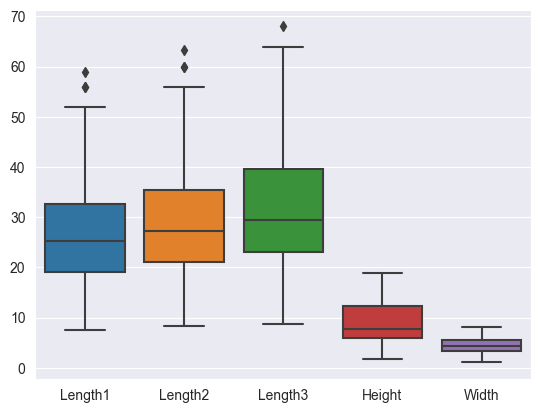

In [83]:
Outlier2=sbn.boxplot(data.drop(['Weight'],axis=1))

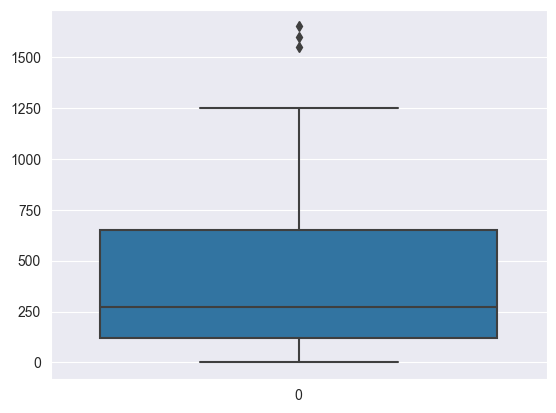

In [84]:
Outlier1=sbn.boxplot(data['Weight'])

**Step 3:** Remove outlier data

In [85]:
data=Outlier(data,data.columns)
data.head(200)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


**Step 4:** Standardization data

In [86]:
mmscaler=MinMaxScaler()
stdscaler=StandardScaler()
data.columns[0]
for columnDT in data.columns :
    if columnDT=='Weight' :
        continue
    data[[columnDT]]=stdscaler.fit_transform(data[[columnDT]])
data.head()


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,-0.257727,-0.231443,-0.036726,0.596952,-0.204281
1,290.0,-0.167526,-0.136956,0.078275,0.819069,-0.032121
2,340.0,-0.178801,-0.115959,0.068692,0.795422,0.203274
3,363.0,0.091801,0.146506,0.298696,0.876911,0.058239
4,430.0,0.114351,0.146506,0.346613,0.810739,0.467241


**Step 5:** Spliting data to train and visualize it

Text(0, 0.5, 'cost')

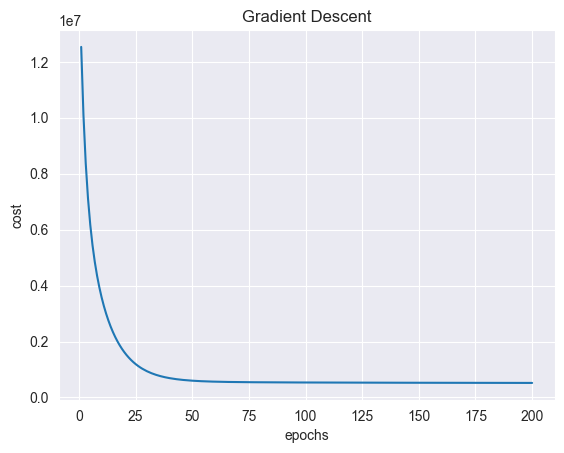

In [87]:
X = data.drop(columns = ["Weight"],axis=1)
y = data["Weight"]
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3,random_state=21520063)
reg_GD = LinearRegression_GD()
reg_GD.fit(X_train, y_train)
reg_NE = LinearRegression_NE()
reg_NE.fit(X_train,y_train)
plt.plot(range(1,len(reg_GD.costs)+1), reg_GD.costs)
plt.title('Gradient Descent')
plt.xlabel('epochs')
plt.ylabel('cost')

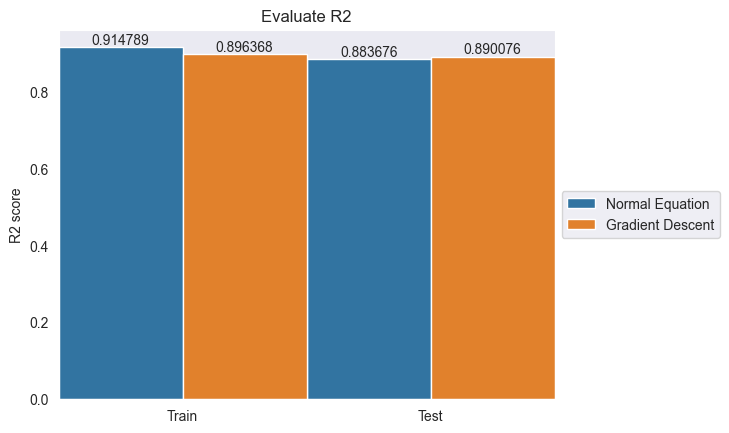

In [88]:
y_train1 = reg_NE.predict(X_train)
y_test1 = reg_NE.predict(X_test)
y_train2 = reg_GD.predict(X_train)
y_test2 = reg_GD.predict(X_test)
listdataR2=[['Train','Normal Equation',round(R2(y_train, y_train1),6)]]
listdataR2.append(['Train','Gradient Descent',round(R2(y_train, y_train2),6)])
listdataR2.append(['Test','Normal Equation',round(R2(y_test, y_test1),6)])
listdataR2.append(['Test','Gradient Descent',round(R2(y_test, y_test2),6)])
R2graph = pd.DataFrame(listdataR2, columns=['Type','Name', 'Values'])
ax = sbn.barplot(data = R2graph, x = 'Type', y = 'Values', hue = 'Name', errwidth=0, width= 1)
plt.title('Evaluate R2')
plt.xlabel('')
plt.ylabel('R2 score')
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in ax.containers:
    ax.bar_label(i,)

# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

<h1> Similar to problem 1, we can do the similar step to insurance.csv problem


**Step 1:**  Import data and library

In [89]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Step 2:** CLear missing data (Preprocessing)
- Method 1 : Erase uncompleted data


In [90]:
data.dropna(inplace=True)

- Method 2 : Filling N/A data by suitable value (mean,median,..)

In [91]:
mean=data.mean()
data.fillna(value=mean,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32064\3735114411.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean=data.mean()


**Step 3:** Label categorical data

In [92]:
encoder=LabelEncoder()
data['smoker']=encoder.fit_transform(data['smoker'])
data['region']=encoder.fit_transform(data['region'])
data['sex']=encoder.fit_transform(data['sex'])

**Step 4:** Remove outlier
We see an outliers (Which is unphenomenal data may be in some unexpected case (Error measuring,...). So we need to ger rid of it from our data

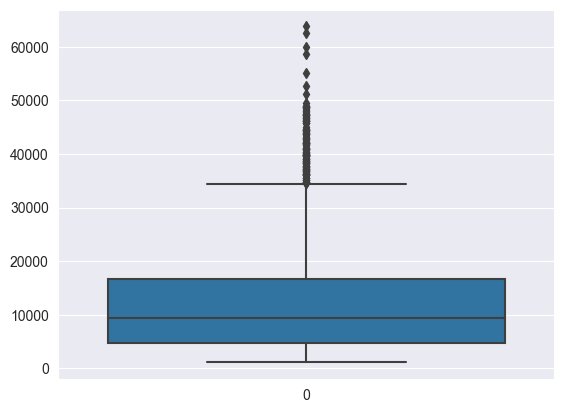

In [93]:
Outlier1=sbn.boxplot(data['charges'])

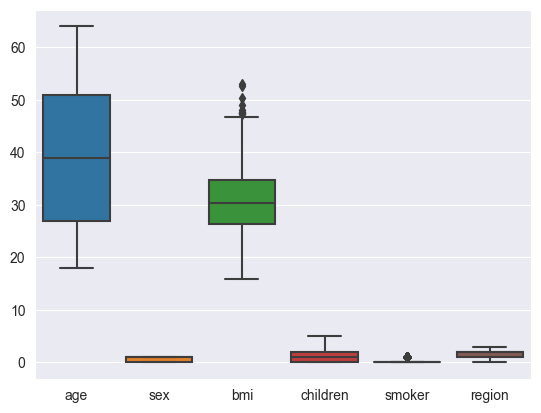

In [94]:
Outlier3=sbn.boxplot(data.drop(['charges'],axis=1))

We see in BMI columns and charges column have many Outlier data so we need to remove that

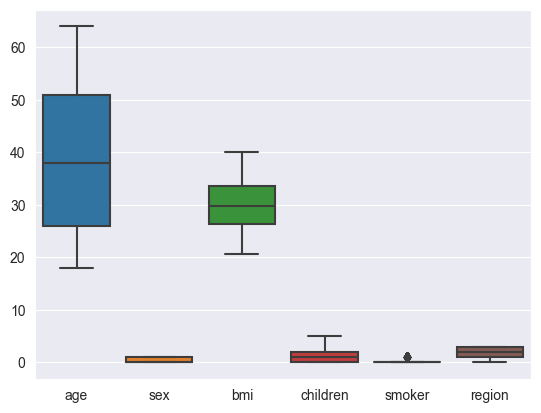

In [95]:
data=Outlier(data,['bmi','charges'],low=0.35,high=0.65)
Outlier4=sbn.boxplot(data.drop(['charges'],axis=1))


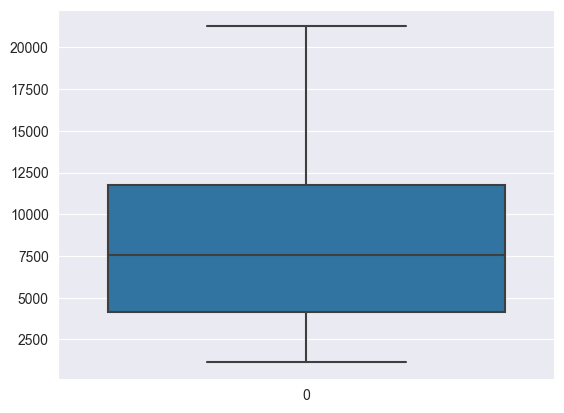

In [96]:
Outlier3=sbn.boxplot(data['charges'])

**Step 5:** Standardization data

In [97]:
mmscaler=MinMaxScaler()
stdscaler=StandardScaler()
data.columns[0]
for columnDT in data.columns :
    if columnDT=='charges' :
        continue
    data[[columnDT]]=stdscaler.fit_transform(data[[columnDT]])
data.head()


,age,sex,bmi,children,smoker,region,charges
0,-1.400017,-0.979548,-0.445159,-0.880759,3.790129,1.321279,16884.9240
1,-1.471581,1.020879,0.777268,-0.058604,-0.263843,0.424366,1725.5523
2,-0.755937,1.020879,0.616915,1.585706,-0.263843,0.424366,4449.4620
4,-0.469679,1.020879,-0.241074,-0.880759,-0.263843,-0.472547,3866.8552
5,-0.541243,-0.979548,-0.894978,-0.880759,-0.263843,0.424366,3756.6216


**Step 6:** Split data, training and visualise

Text(0, 0.5, 'cost')

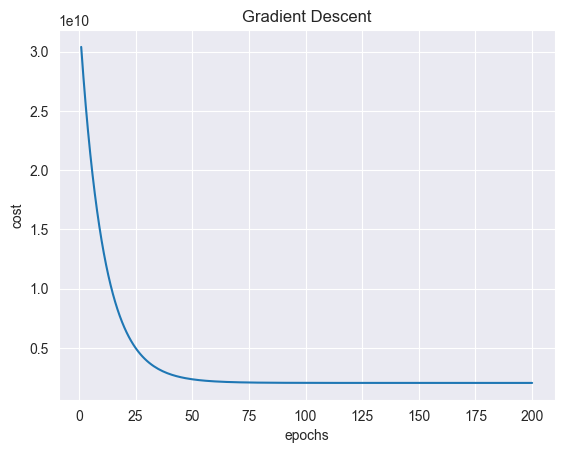

In [98]:
X = data.drop(columns = ['charges'],axis=1)
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3,random_state=21520063)
reg_GD = LinearRegression_GD(max_iter=200)
reg_GD.fit(X_train, y_train)
reg_NE = LinearRegression_NE()
reg_NE.fit(X_train,y_train)
plt.plot(range(1,len(reg_GD.costs)+1), reg_GD.costs)
plt.title('Gradient Descent')
plt.xlabel('epochs')
plt.ylabel('cost')

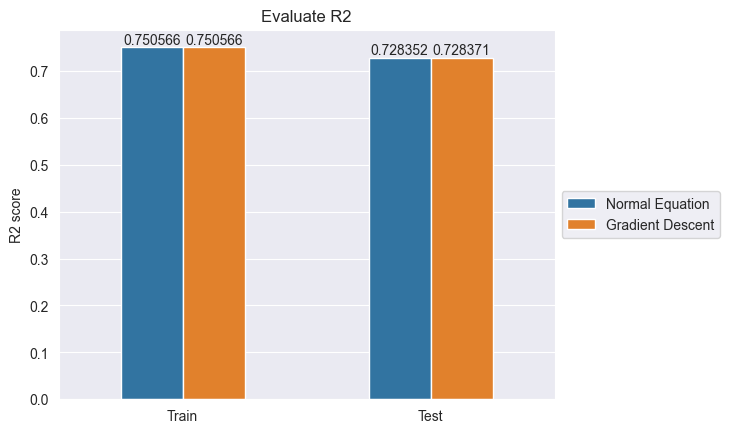

In [99]:
y_train1 = reg_NE.predict(X_train)
y_test1 = reg_NE.predict(X_test)
y_train2 = reg_GD.predict(X_train)
y_test2 = reg_GD.predict(X_test)
listdataR2=[['Train','Normal Equation',round(R2(y_train, y_train1),6)]]
listdataR2.append(['Train','Gradient Descent',round(R2(y_train, y_train2),6)])
listdataR2.append(['Test','Normal Equation',round(R2(y_test, y_test1),6)])
listdataR2.append(['Test','Gradient Descent',round(R2(y_test, y_test2),6)])
R2graph = pd.DataFrame(listdataR2, columns=['Type','Name', 'Values'])
ax = sbn.barplot(data = R2graph, x = 'Type', y = 'Values', hue = 'Name', errwidth=0, width= 0.5)
plt.title('Evaluate R2')
plt.xlabel('')
plt.ylabel('R2 score')
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in ax.containers:
    ax.bar_label(i,)

# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day


**Step 1:**  Import data and library

In [100]:
data=pd.read_csv("tesla_stock.csv")
data.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


**Step 2:** CLear missing data (Preprocessing)
- Method 1 : Erase uncompleted data


In [101]:
data.dropna(inplace=True)

- Method 2 : Filling N/A data by suitable value (mean,median,..)

In [102]:
mean=data.mean()
data.fillna(value=mean,inplace=True)

**Step 3:** Remove outlier data
We see an outliers (Which is unphenomenal data may be in some unexpected case (Error measuring,...). So we need to ger rid of it from our data

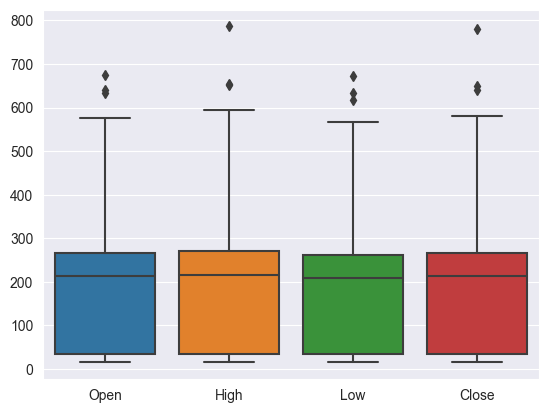

In [103]:
Outlier2=sbn.boxplot(data.drop(['Volume'],axis=1))

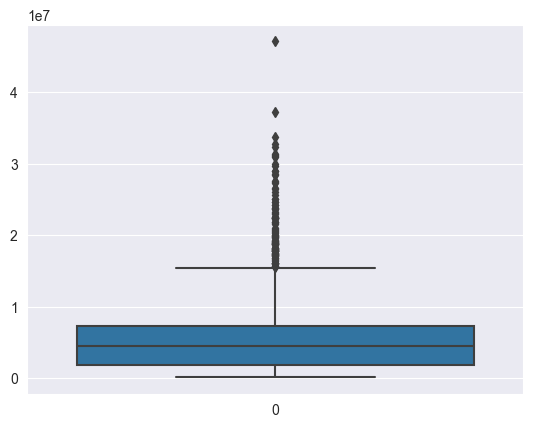

In [104]:
Outlier2=sbn.boxplot(data['Volume'])

In [105]:
data=Outlier(data,data.columns,0.25,0.5)
data.head()

,Open,High,Low,Close,Volume
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
5,16.400000,16.629999,14.980000,15.800000,6921700
6,16.139999,17.520000,15.570000,17.459999,7711400


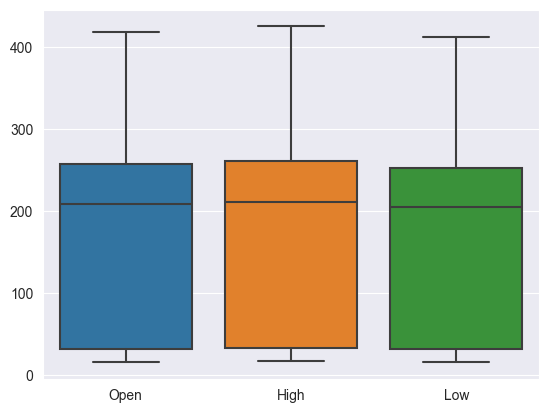

In [106]:
Outlier5=sbn.boxplot(data.drop(['Volume','Close'],axis=1))

**Step 5:** Standardization

In [108]:
mmscaler=MinMaxScaler()
stdscaler=StandardScaler()
data.columns[0]
for columnDT in data.columns :
    if columnDT=='Close' :
        continue
    data[[columnDT]]=stdscaler.fit_transform(data[[columnDT]])
data.head()

,Open,High,Low,Close,Volume
2,-1.259009,-1.256286,-1.294404,21.959999,1.872002
3,-1.276068,-1.280019,-1.307899,19.200001,0.574004
4,-1.301656,-1.306109,-1.332814,16.110001,1.302088
5,-1.332362,-1.334472,-1.340167,15.800000,1.325190
6,-1.334579,-1.326982,-1.335063,17.459999,1.658100


**Step 6:** Splitting data, training and visualizing result

Text(0, 0.5, 'cost')

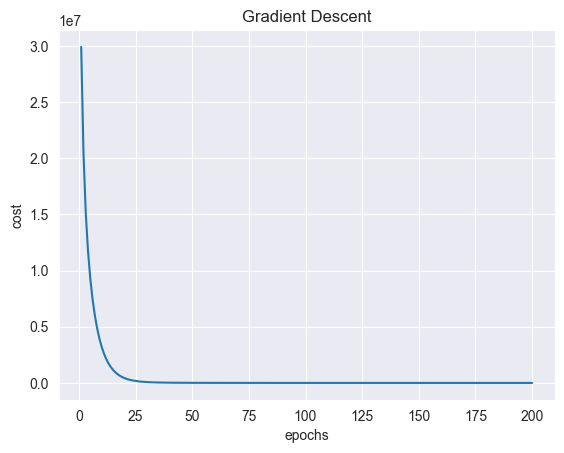

In [109]:
X = data.drop(columns = ['Close'],axis=1)
y = data["Close"]
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3,random_state=21520063)
reg_GD = LinearRegression_GD(0.1,max_iter=200)
reg_GD.fit(X_train, y_train)
reg_NE = LinearRegression_NE()
reg_NE.fit(X_train,y_train)
plt.plot(range(1,len(reg_GD.costs)+1), reg_GD.costs)
plt.title('Gradient Descent')
plt.xlabel('epochs')
plt.ylabel('cost')

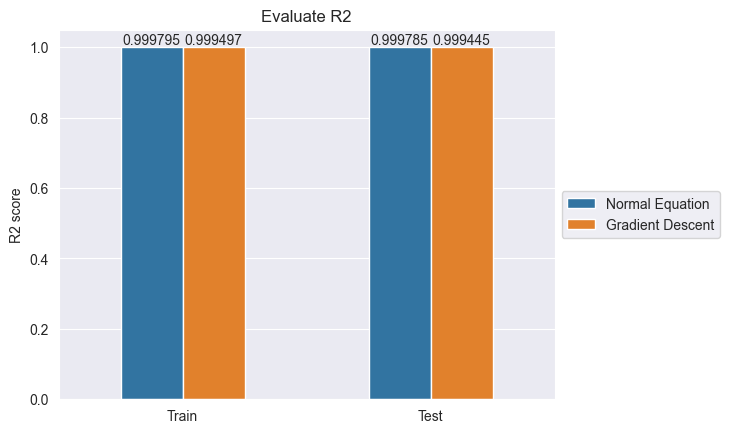

In [110]:
y_train1 = reg_NE.predict(X_train)
y_test1 = reg_NE.predict(X_test)
y_train2 = reg_GD.predict(X_train)
y_test2 = reg_GD.predict(X_test)
listdataR2=[['Train','Normal Equation',round(R2(y_train, y_train1),6)]]
listdataR2.append(['Train','Gradient Descent',round(R2(y_train, y_train2),6)])
listdataR2.append(['Test','Normal Equation',round(R2(y_test, y_test1),6)])
listdataR2.append(['Test','Gradient Descent',round(R2(y_test, y_test2),6)])
R2graph = pd.DataFrame(listdataR2, columns=['Type','Name', 'Values'])
ax = sbn.barplot(data = R2graph, x = 'Type', y = 'Values', hue = 'Name', errwidth=0, width= 0.5)
plt.title('Evaluate R2')
plt.xlabel('')
plt.ylabel('R2 score')
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in ax.containers:
    ax.bar_label(i,)